In [18]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(extrafont)
#font_import()


get_variance_differences <- function(result) {
  diff_1_2 <- result[["variance"]][,1] - result[["variance"]][,2]
  diff_1_3 <- result[["variance"]][,1] - result[["variance"]][,3]
  return(data.frame(diff_1_2 = diff_1_2, diff_1_3 = diff_1_3))
}

get_mse_differences <- function(result) {
  diff_1_2 <- sqrt(result[["MSE_matrix"]][,1]) - sqrt(result[["MSE_matrix"]][,2])
  diff_1_3 <- sqrt(result[["MSE_matrix"]][,1]) - sqrt(result[["MSE_matrix"]][,3])
  return(data.frame(diff_1_2 = diff_1_2, diff_1_3 = diff_1_3))
}

In [19]:
Plot_var <- function(result_1, result_2, result_3, result_4, n_1, n_2, n_3, n_4, title){
    data_variance_1 <- get_variance_differences(result_1)
    data_variance_2 <- get_variance_differences(result_2)
    data_variance_3 <- get_variance_differences(result_3)
    data_variance_4 <- get_variance_differences(result_4)

    data_variance_1$n <- n_1
    data_variance_2$n <- n_2
    data_variance_3$n <- n_3
    data_variance_4$n <- n_4
    combined_data <- bind_rows(data_variance_1, data_variance_2, data_variance_3, data_variance_4)

    combined_data_long <- combined_data %>%
      pivot_longer(cols = c("diff_1_2", "diff_1_3"), names_to = "difference_type", values_to = "variance_difference")


    ggplot(combined_data_long, aes(x = as.factor(n), y = variance_difference, fill = difference_type)) +
      geom_boxplot() +
      labs(title = title, x = "n", y = "Variance Difference") +
      geom_hline(yintercept = 0, color = "red",linewidth=1.5) +
      theme_minimal() +

      theme(
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        legend.position = c(0.5, 0.85),
        legend.background = element_rect(fill = alpha("white", 0), color = NA),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        axis.title.x = element_text(family = "Times New Roman", size = 45, face = "bold"),
        axis.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.title = element_text(family = "Times New Roman", size = 35, face = "bold"),
        legend.text = element_text(family = "Times New Roman", size = 35, face = "bold"),
        plot.title = element_text(family = "Times New Roman",hjust = 0.5, size = 45, face = "bold")  
      ) +

      scale_fill_manual(
        values = c("diff_1_2" = "lightblue", "diff_1_3" = "green"),
        name = "",
        labels = c(expression(bold(Var(italic(tilde(y))) - Var(hat(italic(y))[U]))), expression(bold(Var(italic(tilde(y))) - Var(hat(italic(y))[V]))))
      )+
    coord_cartesian(ylim = c(0, 0.045))

}


Plot_mse <- function(result_1, result_2, result_3, result_4, n_1, n_2, n_3, n_4, title){
       
    data_mse_1 <- get_mse_differences(result_1)
    data_mse_2 <- get_mse_differences(result_2)
    data_mse_3 <- get_mse_differences(result_3)
    data_mse_4 <- get_mse_differences(result_4)

    data_mse_1$n <- n_1
    data_mse_2$n <- n_2
    data_mse_3$n <- n_3
    data_mse_4$n <- n_4

    combined_data <- bind_rows(data_mse_1, data_mse_2, data_mse_3, data_mse_4)

    combined_data_long <- combined_data %>%
      pivot_longer(cols = c("diff_1_2", "diff_1_3"), names_to = "difference_type", values_to = "mse_difference")

     ggplot(combined_data_long, aes(x = as.factor(n), y = mse_difference, fill = difference_type)) +
      geom_boxplot() +
      labs(title = title, x = "n", y = "RMSE Difference") +
      geom_hline(yintercept = 0, color = "red",linewidth=1.5) +
      theme_minimal() +

      theme(
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        legend.position = c(0.6, 0.85), 
        legend.background = element_rect(fill = alpha("white", 0), color = NA),

        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),

        axis.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        axis.title.x = element_text(family = "Times New Roman", size = 45, face = "bold"),
        axis.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.title = element_text(family = "Times New Roman", size = 40, face = "bold"),
        legend.text = element_text(family = "Times New Roman", size = 40, face = "bold"),
        plot.title = element_text(family = "Times New Roman",hjust = 0.5, size = 45, face = "bold")  
      ) +

      scale_fill_manual(
        values = c("diff_1_2" = "gray", "diff_1_3" = "white"),
        name = "",
        labels = c(expression(bold(tilde(italic(R)) - hat(italic(R))[U])),expression(bold(tilde(italic(R)) - hat(italic(R))[V])))
      )+
    coord_cartesian(ylim = c(-0.035, 0.065))
    }


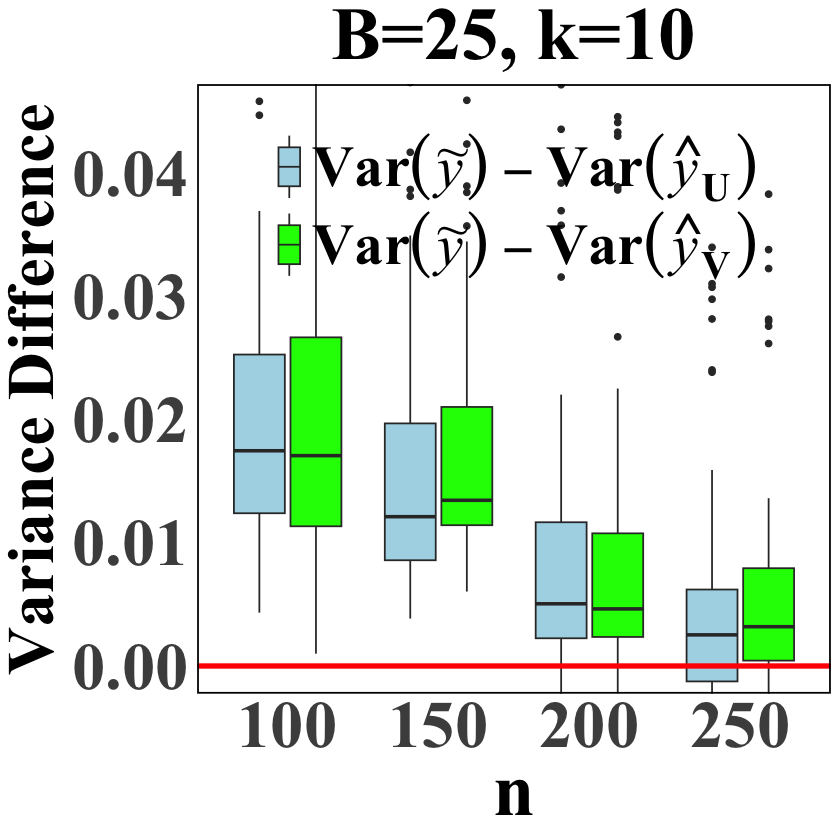

U-statistics,V-statistics
1.279,1.118
3.792,3.811


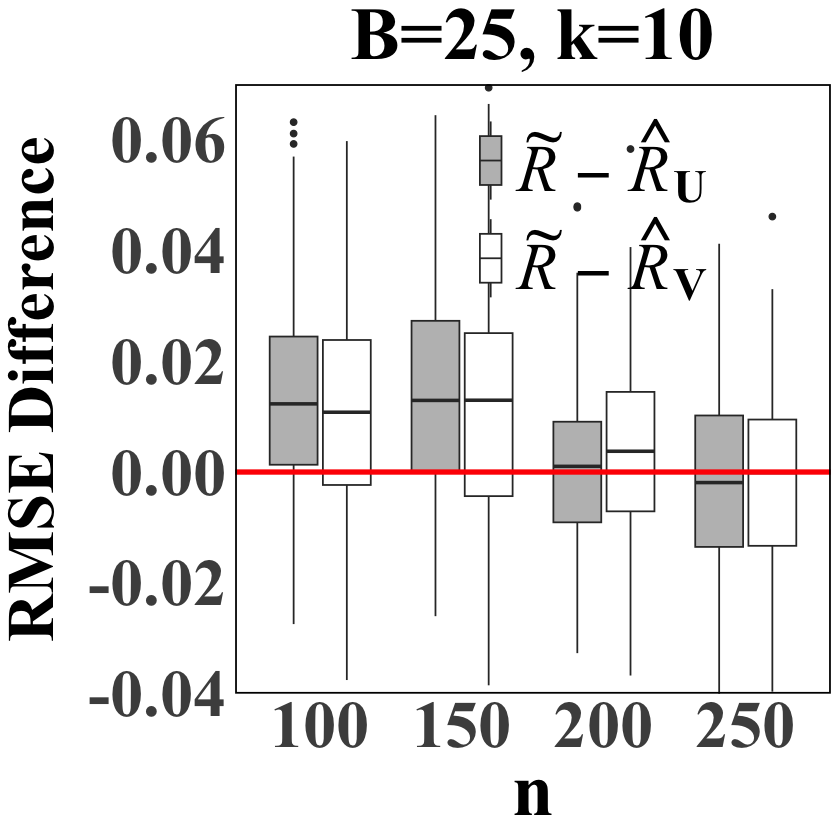

In [20]:
result_2 <- dget(file = "kr_1.4.1.txt")
result_3 <- dget(file = "kr_1.4.2.txt")
result_4 <- dget(file = "kr_1.4.3.txt")
result_5 <- dget(file = "kr_1.4.4.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4,result_5, n_2, n_3, n_4, n_5, title = "B=25, k=10")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4,n_5,  title = "B=25, k=10")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

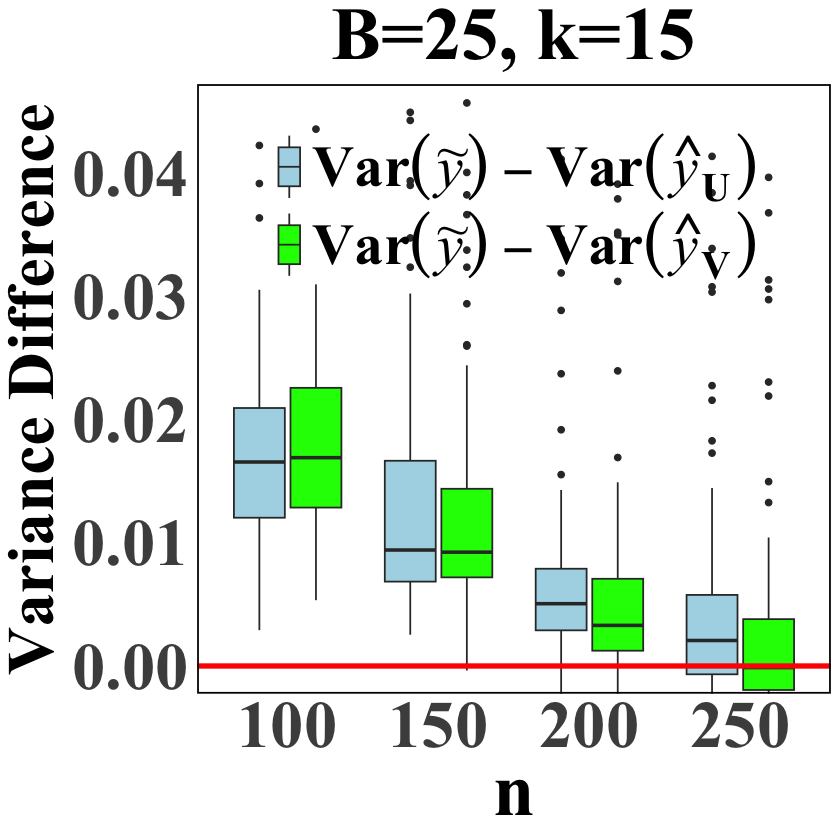

U-statistics,V-statistics
1.139,1.105
3.658,3.620


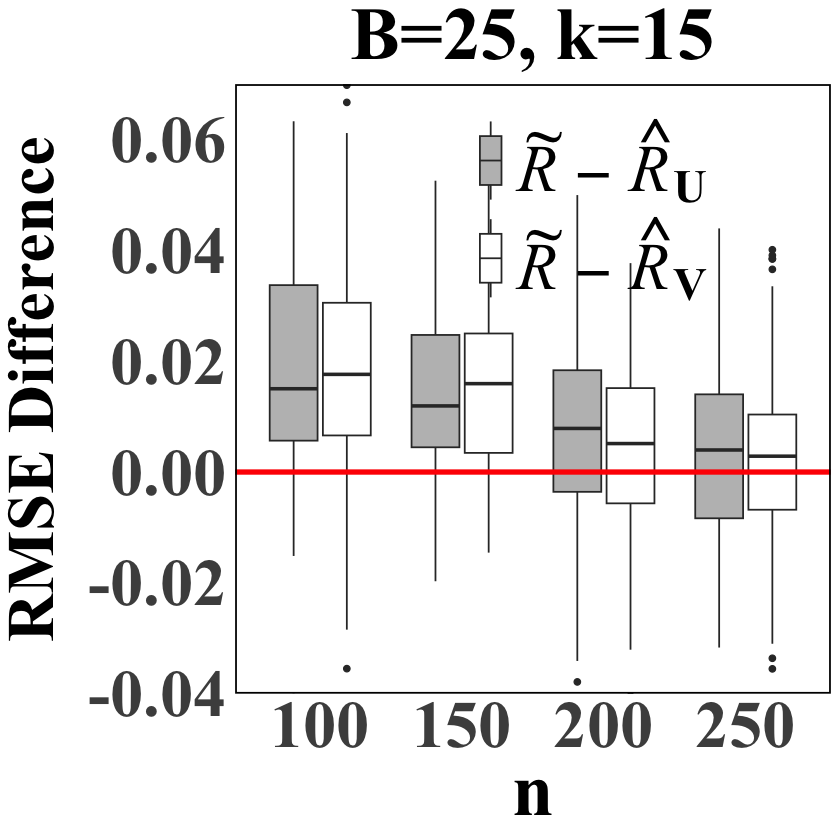

In [21]:
result_2 <- dget(file = "kr_3.4.2.txt")
result_3 <- dget(file = "kr_3.4.3.txt")
result_4 <- dget(file = "kr_3.4.4.txt")
result_5 <- dget(file = "kr_3.4.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4,result_5, n_2, n_3, n_4, n_5, title = "B=25, k=15")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4,n_5,  title = "B=25, k=15")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

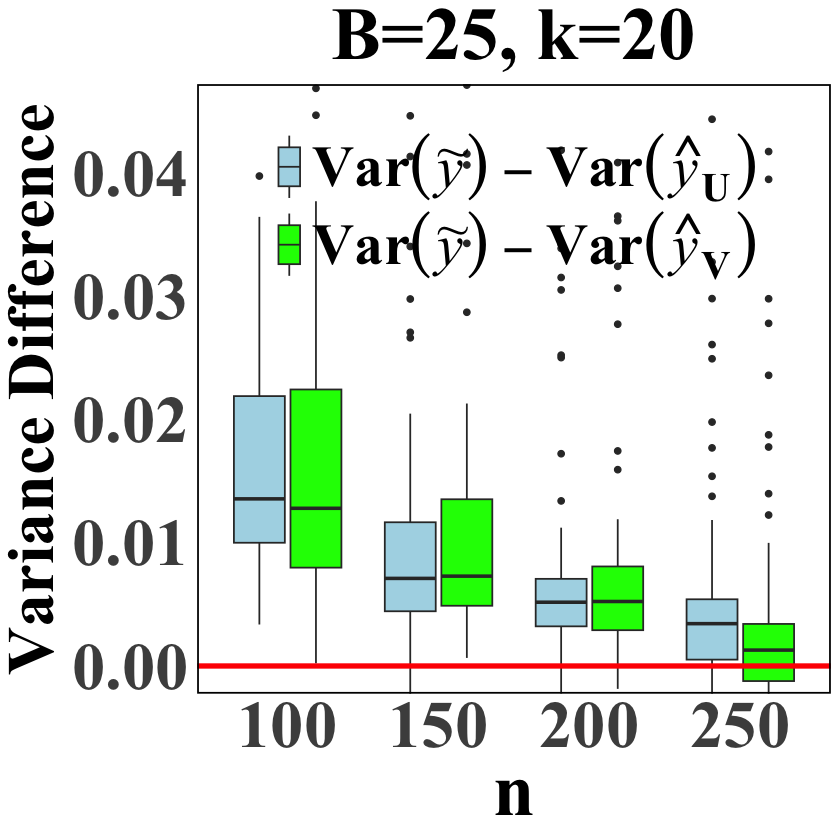

U-statistics,V-statistics
0.968,1.018
3.473,3.449


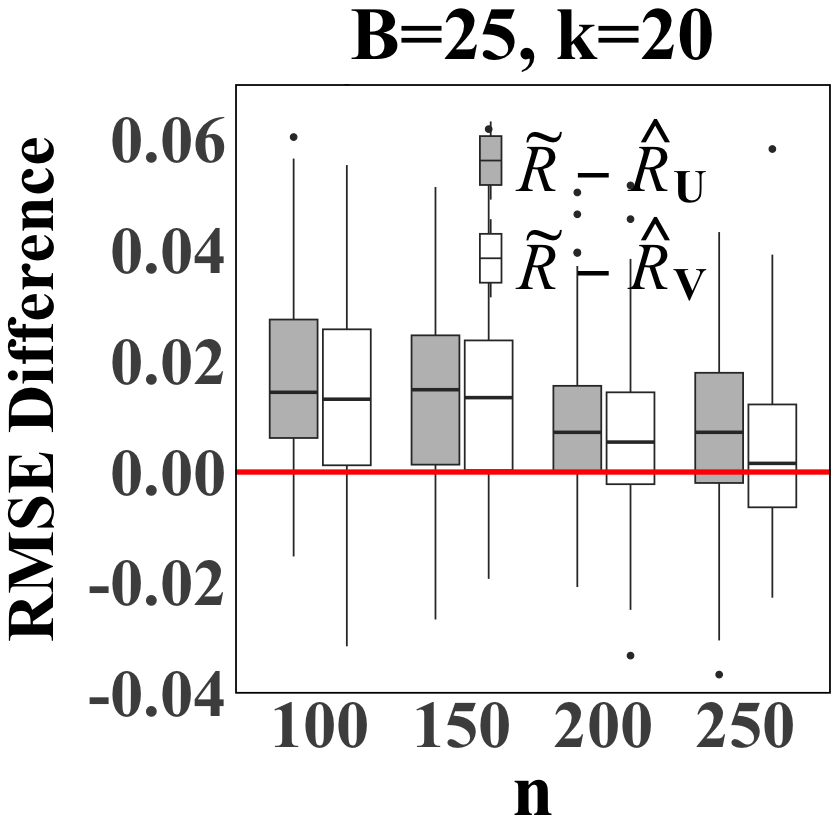

In [22]:
result_2 <- dget(file = "kr_4.4.2.txt")
result_3 <- dget(file = "kr_4.4.3.txt")
result_4 <- dget(file = "kr_4.4.4.txt")
result_5 <- dget(file = "kr_4.4.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4,result_5, n_2, n_3, n_4, n_5, title = "B=25, k=20")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4,n_5,  title = "B=25, k=20")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

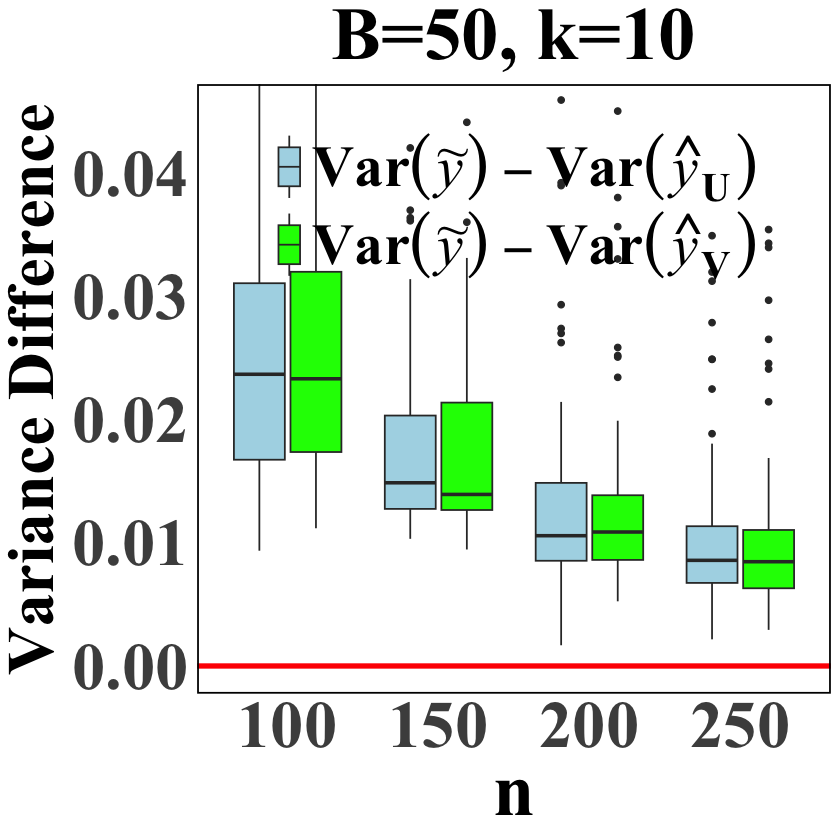

U-statistics,V-statistics
0.369,0.323
3.005,2.905


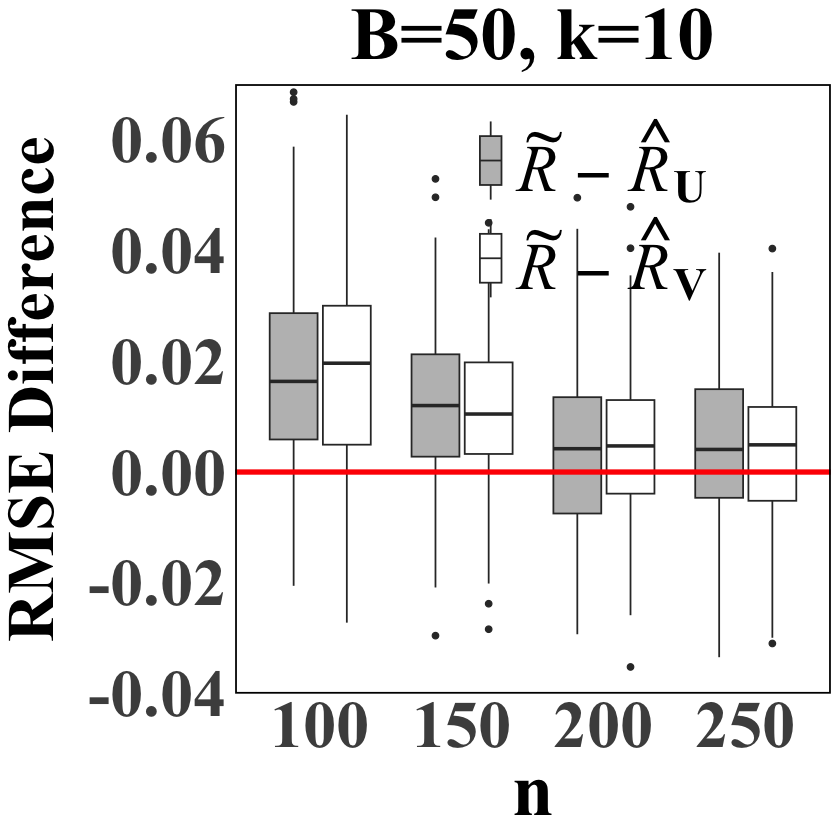

In [24]:
result_2 <- dget(file = "kr_1.0.1.txt")
result_3 <- dget(file = "kr_1.0.2.txt")
result_4 <- dget(file = "kr_1.0.3.txt")
result_5 <- dget(file = "kr_1.0.4.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4,result_5, n_2, n_3, n_4, n_5, title = "B=50, k=10")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4,n_5,  title = "B=50, k=10")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

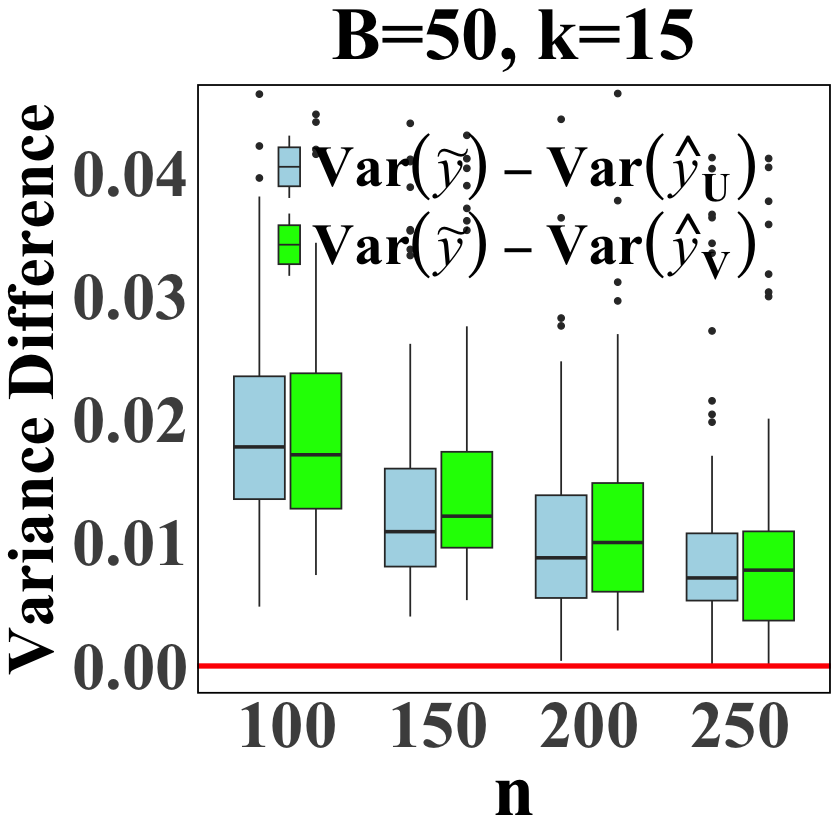

U-statistics,V-statistics
0.335,0.272
2.850,2.804


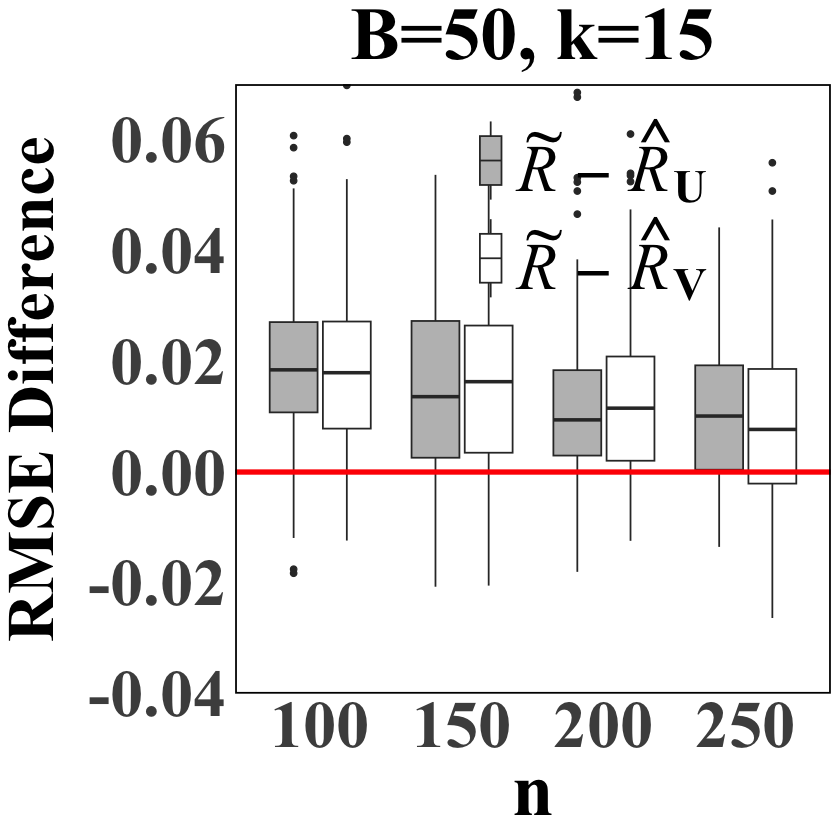

In [25]:
result_2 <- dget(file = "kr_3.0.2.txt")
result_3 <- dget(file = "kr_3.0.3.txt")
result_4 <- dget(file = "kr_3.0.4.txt")
result_5 <- dget(file = "kr_3.0.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4,result_5, n_2, n_3, n_4, n_5, title = "B=50, k=15")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4,n_5,  title = "B=50, k=15")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

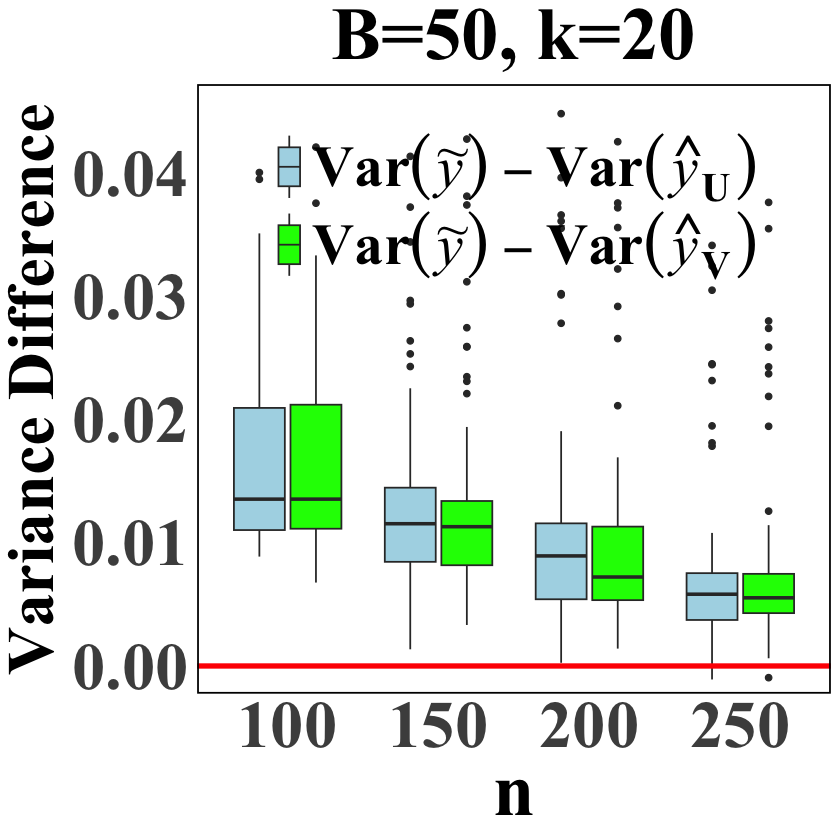

U-statistics,V-statistics
0.108,0.110
2.954,2.848


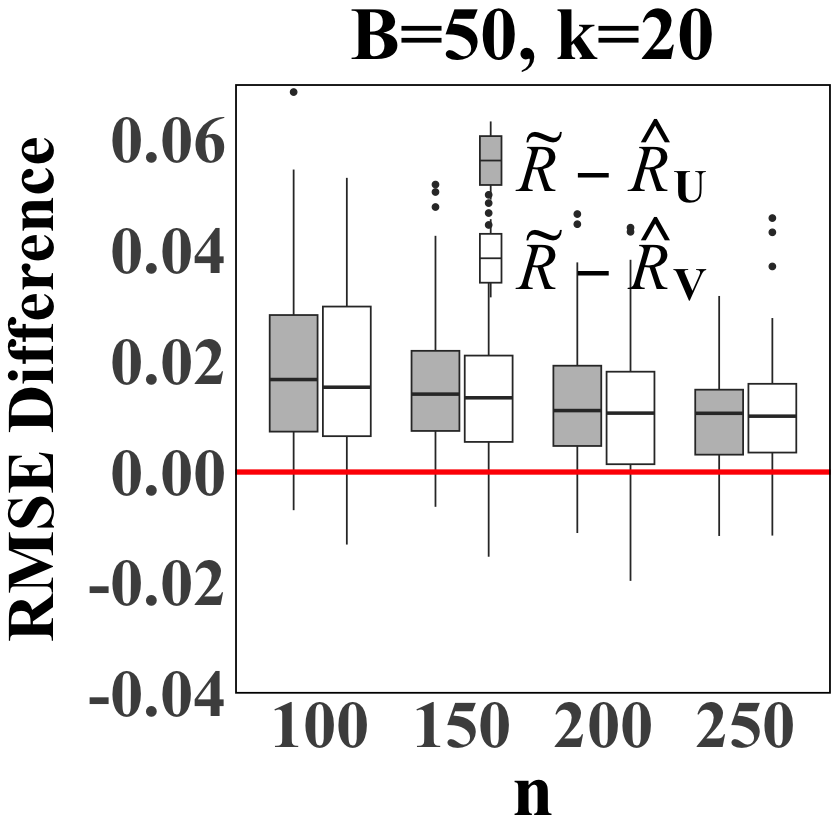

In [26]:
result_2 <- dget(file = "kr_4.0.2.txt")
result_3 <- dget(file = "kr_4.0.3.txt")
result_4 <- dget(file = "kr_4.0.4.txt")
result_5 <- dget(file = "kr_4.0.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5, title = "B=50, k=20")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5, title = "B=50, k=20")

Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

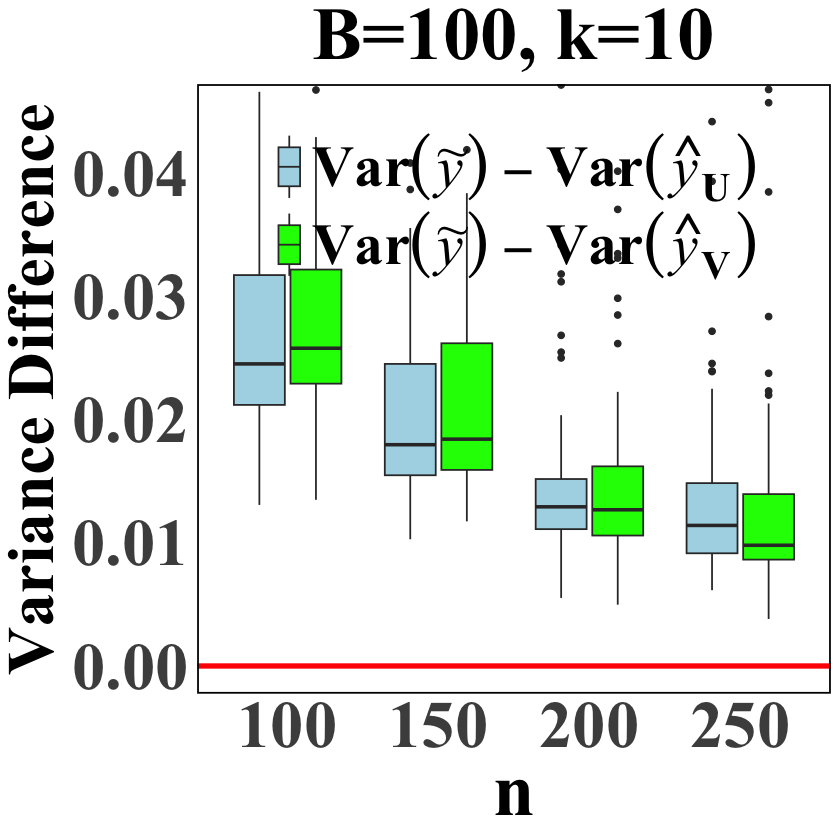

U-statistics,V-statistics
-1.108,-1.078
1.357,1.245


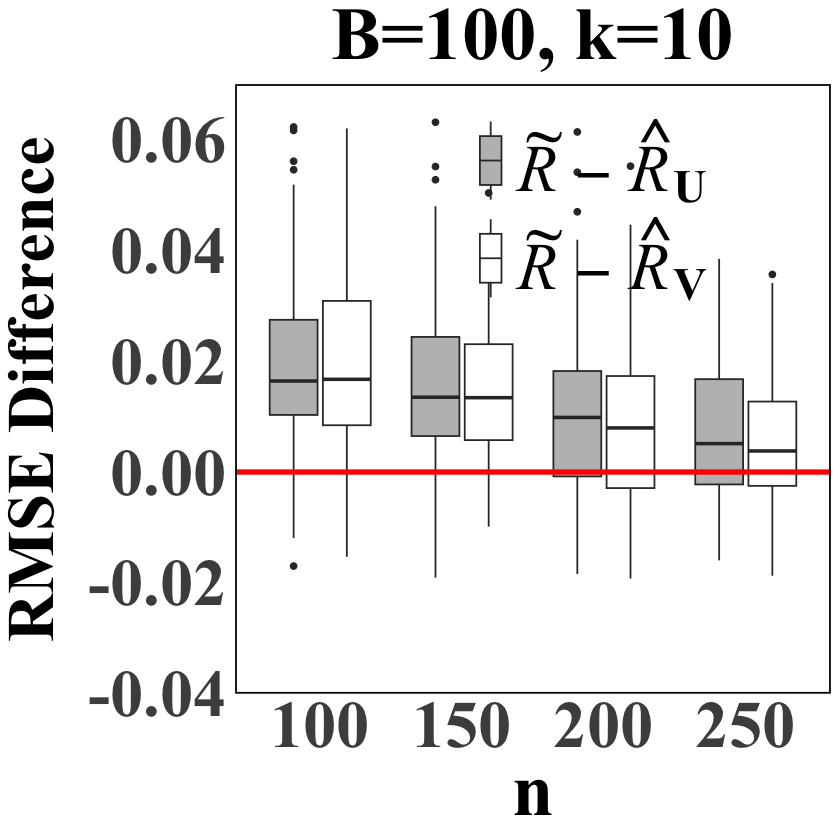

In [27]:
result_2 <- dget(file = "kr_1.1.1.txt")
result_3 <- dget(file = "kr_1.1.2.txt")
result_4 <- dget(file = "kr_1.1.3.txt")
result_5 <- dget(file = "kr_1.1.4.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5, title = "B=100, k=10")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5,  title = "B=100, k=10")


Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

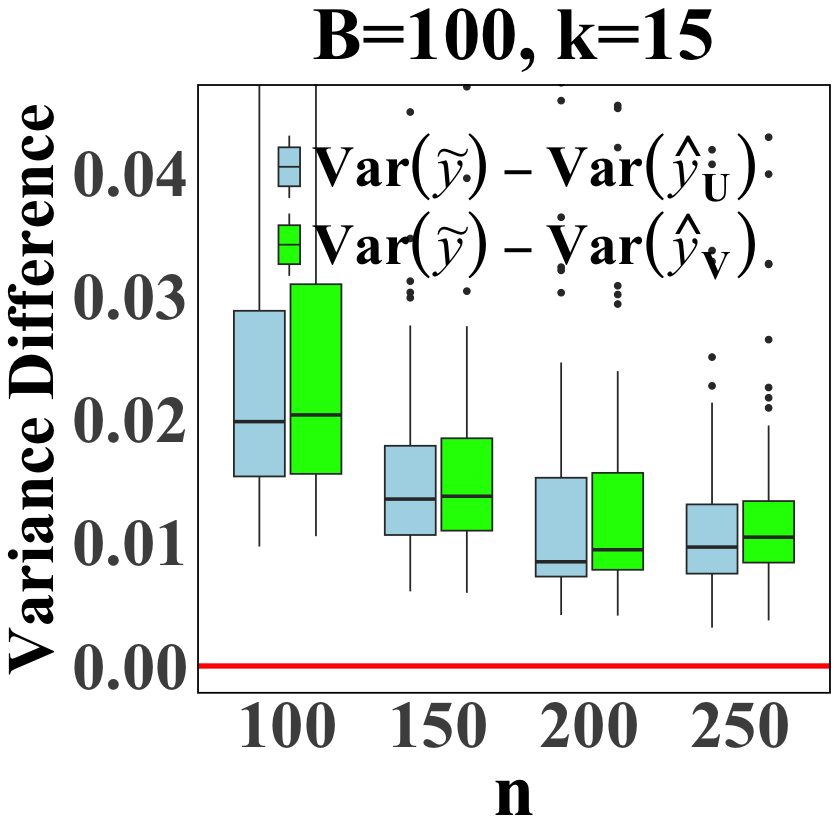

U-statistics,V-statistics
-1.616,-1.713
0.949,0.658


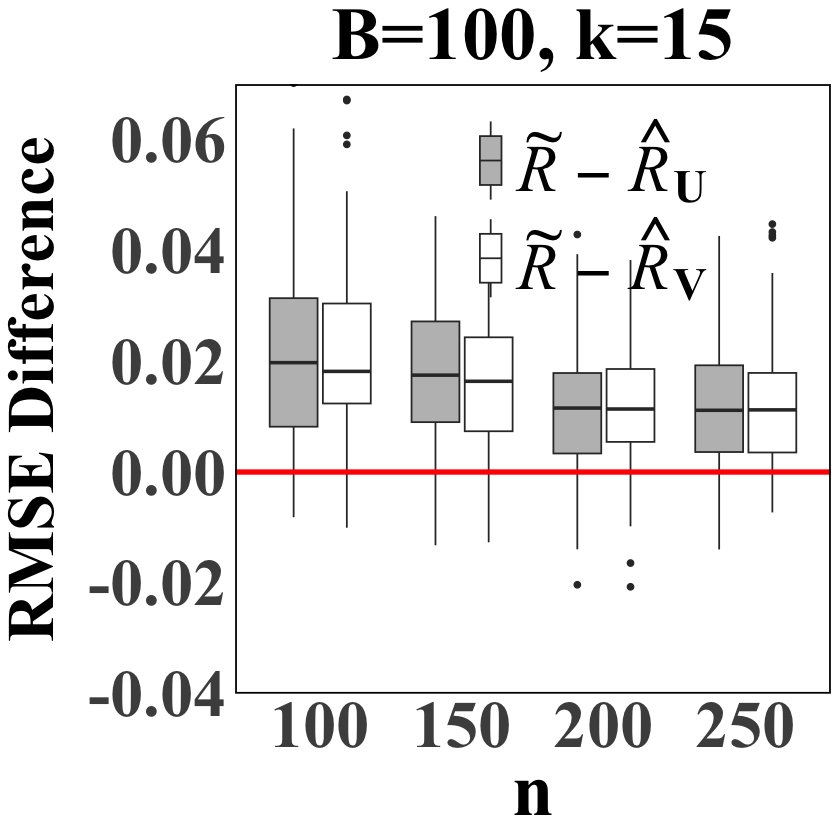

In [28]:
result_2 <- dget(file = "kr_3.1.2.txt")
result_3 <- dget(file = "kr_3.1.3.txt")
result_4 <- dget(file = "kr_3.1.4.txt")
result_5 <- dget(file = "kr_3.1.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5, title = "B=100, k=15")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5,  title = "B=100, k=15")


Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced

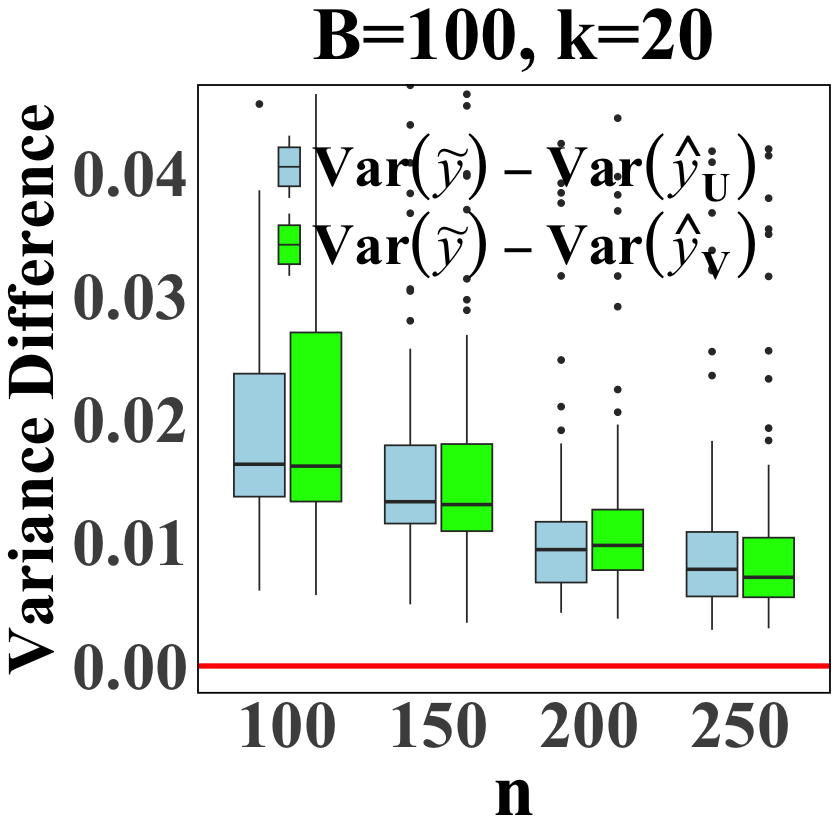

U-statistics,V-statistics
-2.147,-2.246
0.703,0.689


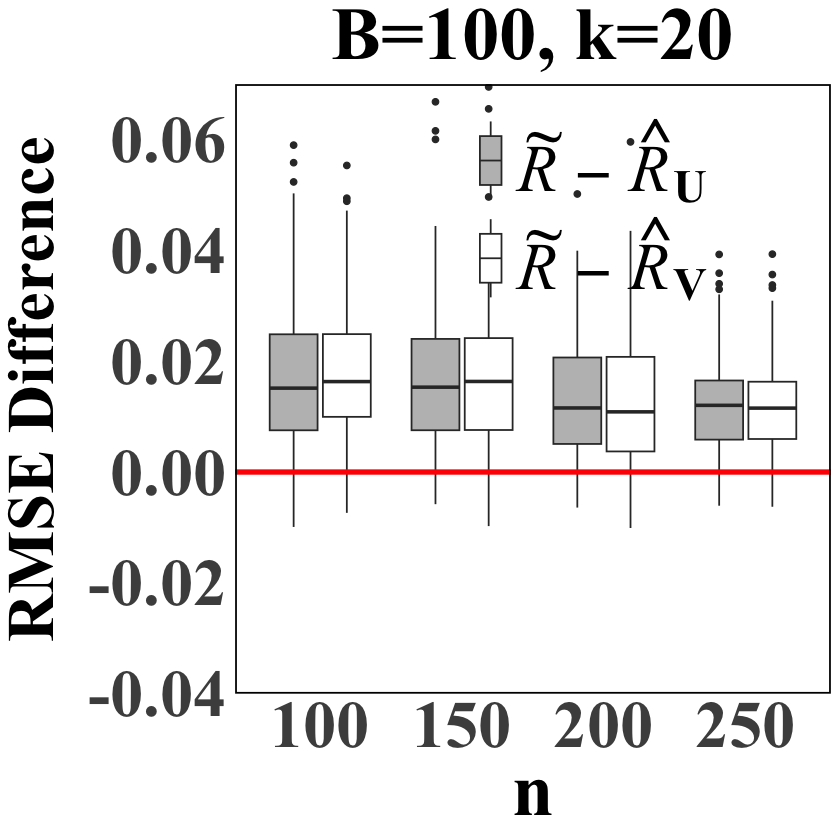

In [29]:
result_2 <- dget(file = "kr_4.1.2.txt")
result_3 <- dget(file = "kr_4.1.3.txt")
result_4 <- dget(file = "kr_4.1.4.txt")
result_5 <- dget(file = "kr_4.1.5.txt")
n_2=100; n_3=150; n_4=200; n_5=250

Plot_var(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5, title = "B=100, k=20")
Plot_mse(result_2, result_3, result_4, result_5, n_2, n_3, n_4, n_5,  title = "B=100, k=20")


Time_Deduced <- matrix(1:4, ncol = 2)
colnames(Time_Deduced) <- c("U-statistics", "V-statistics")

Time_Deduced[1,1] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][2])
Time_Deduced[2,1] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][2])


Time_Deduced[1,2] = as.numeric(result_3[["Time_all"]][1]-result_3[["Time_all"]][3])
Time_Deduced[2,2] = as.numeric(result_4[["Time_all"]][1]-result_4[["Time_all"]][3])

Time_Deduced